In [2]:
import numpy as np
import libpysal
import spreg
import geopandas as gpd
from local_functions import *

In [3]:
territories

,Teritoriālā vienība,Platība (km^2),geometry
0,Alūksnes nov.,1697.58,"MULTIPOLYGON (((661350.885 356683.428, 661395...."
1,Līvānu nov.,622.56,"MULTIPOLYGON (((656103.955 251878.614, 656064...."
2,Gulbenes nov.,1872.22,"MULTIPOLYGON (((646392.315 325527.604, 646296...."
3,Ventspils nov.,2458.58,"MULTIPOLYGON (((392249.162 372594.848, 392280...."
4,Valkas nov.,908.83,"MULTIPOLYGON (((638394.812 377932.581, 638255...."
5,Salaspils nov.,122.82,"MULTIPOLYGON (((516889.45 303131.99, 516943.36..."
6,Jelgava,60.56,"MULTIPOLYGON (((478224.011 281713.874, 478262...."
7,Rēzekne,17.50,"MULTIPOLYGON (((707885.185 268612.825, 707885...."
8,Jūrmala,101.36,"MULTIPOLYGON (((468081.512 311106.489, 468067...."
9,Ventspils,57.97,"MULTIPOLYGON (((352239.171 360297.809, 352204...."


In [27]:
territorial_information = gpd.read_file("data/transformed/territorial_information_summary.geojson")

In [48]:
for c in territorial_information.columns:
    print(c)

Teritoriālā vienība
Platība (km^2)
Gads
Iedzīvotāju skaits gada sākumā
Gada vidējais iedzīvotāju skaits
Iedzīvotāju dabiskais pieaugums
Migrācijas saldo
Iedzīvotāju skaita izmaiņas - pavisam
Mēneša darba samaksas mediāna
Iedzīvotāji darbspējas vecumā
Ekonomiskās aktivitātes līmenis
Nodarbinātības līmenis
Bezdarba līmenis
Ekonomiski aktīvi uzņēmumi (uz 1000 iedz.)
Ekspluatācijā pieņemto dzīvokļu platība (tūkst. m2)
Izdevumi sociālā atbalsta pasākumiem
Ceļu un ielu izdevumi (investīcijas)
Ceļu un ielu izdevumi (uzturēšana)
Ūdens izmantošana ražošanas vajadzībām (tūkst. m3)
Ūdens izmantošana komunālajām un sadzīves vajadzībām (tūkst. m3)
Autoceļu un pašvaldību ielu garums (asfaltbetons)
autoceļu un pašvaldību ielu garums (šķembu)
Iedzīvotāju īpatsvars ar augstāko izglītību
Bruto pievienotā vērtība uz vienu iedzīvotāju
Iekšzemes kopprodukts uz vienu iedzīvotāju
Daudzdzīvokļu ēku skaits
Savrupmāju skaits
Vidējais attālums līdz ārstam (m)
Vidējais attālums līdz slimnīcai (m)
Vidējais attālum

In [32]:
territorial_information_2023 = territorial_information[territorial_information.Gads == 2023]
W = libpysal.weights.Queen.from_dataframe(territorial_information_2023, ids="Teritoriālā vienība")
W.transform = "R"

In [11]:
?libpysal.weights.Queen.from_dataframe

Signature:
libpysal.weights.Queen.from_dataframe(
    df,
    geom_col=None,
    idVariable=None,
    ids=None,
    id_order=None,
    use_index=None,
    **kwargs,
)
Docstring:
Construct a weights object from a (geo)pandas dataframe with a geometry
column. This will cast the polygons to PySAL polygons, then build the W
using ids from the dataframe.

Parameters
----------
df          : DataFrame
              a :class: `pandas.DataFrame` containing geometries to use
              for spatial weights
geom_col    : string
              the name of the column in `df` that contains the
              geometries. Defaults to active geometry column.
idVariable  : string
              DEPRECATED - use `ids` instead.
              the name of the column to use as IDs. If nothing is
              provided, the dataframe index is used
ids         : list-like, string
              a list-like of ids to use to index the spatial weights object or
              the name of the column to use as IDs. I

In [6]:
W

In [13]:
W

{'Alūksnes nov.': [1.0, 1.0, 1.0],
 'Līvānu nov.': [1.0, 1.0, 1.0],
 'Gulbenes nov.': [1.0, 1.0, 1.0, 1.0, 1.0],
 'Ventspils nov.': [1.0, 1.0, 1.0, 1.0],
 'Valkas nov.': [1.0, 1.0],
 'Salaspils nov.': [1.0, 1.0, 1.0, 1.0],
 'Jelgava': [1.0],
 'Rēzekne': [1.0],
 'Jūrmala': [1.0, 1.0, 1.0],
 'Ventspils': [1.0],
 'Rīga': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'Liepāja': [1.0],
 'Dienvidkurzemes nov.': [1.0, 1.0, 1.0, 1.0],
 'Kuldīgas nov.': [1.0, 1.0, 1.0, 1.0, 1.0],
 'Saldus nov.': [1.0, 1.0, 1.0, 1.0],
 'Talsu nov.': [1.0, 1.0, 1.0],
 'Tukuma nov.': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'Dobeles nov.': [1.0, 1.0, 1.0],
 'Jelgavas nov.': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'Mārupes nov.': [1.0, 1.0, 1.0, 1.0, 1.0],
 'Bauskas nov.': [1.0, 1.0, 1.0, 1.0, 1.0],
 'Ogres nov.': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'Aizkraukles nov.': [1.0, 1.0, 1.0, 1.0],
 'Jēkabpils nov.': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'Ludzas nov.': [1.0, 1.0, 1.0],
 'Rēzeknes nov.': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [20]:
print(W.neighbors)

{'Alūksnes nov.': ['Balvu nov.', 'Gulbenes nov.', 'Smiltenes nov.'], 'Līvānu nov.': ['Preiļu nov.', 'Jēkabpils nov.', 'Augšdaugavas nov.'], 'Gulbenes nov.': ['Balvu nov.', 'Smiltenes nov.', 'Madonas nov.', 'Alūksnes nov.', 'Cēsu nov.'], 'Ventspils nov.': ['Kuldīgas nov.', 'Ventspils', 'Dienvidkurzemes nov.', 'Talsu nov.'], 'Valkas nov.': ['Smiltenes nov.', 'Valmieras nov.'], 'Salaspils nov.': ['Ķekavas nov.', 'Rīga', 'Ropažu nov.', 'Ogres nov.'], 'Jelgava': ['Jelgavas nov.'], 'Rēzekne': ['Rēzeknes nov.'], 'Jūrmala': ['Tukuma nov.', 'Mārupes nov.', 'Rīga'], 'Ventspils': ['Ventspils nov.'], 'Rīga': ['Ādažu nov.', 'Mārupes nov.', 'Ķekavas nov.', 'Olaines nov.', 'Salaspils nov.', 'Jūrmala', 'Ropažu nov.'], 'Liepāja': ['Dienvidkurzemes nov.'], 'Dienvidkurzemes nov.': ['Saldus nov.', 'Ventspils nov.', 'Kuldīgas nov.', 'Liepāja'], 'Kuldīgas nov.': ['Saldus nov.', 'Tukuma nov.', 'Dienvidkurzemes nov.', 'Ventspils nov.', 'Talsu nov.'], 'Saldus nov.': ['Kuldīgas nov.', 'Tukuma nov.', 'Dobeles no

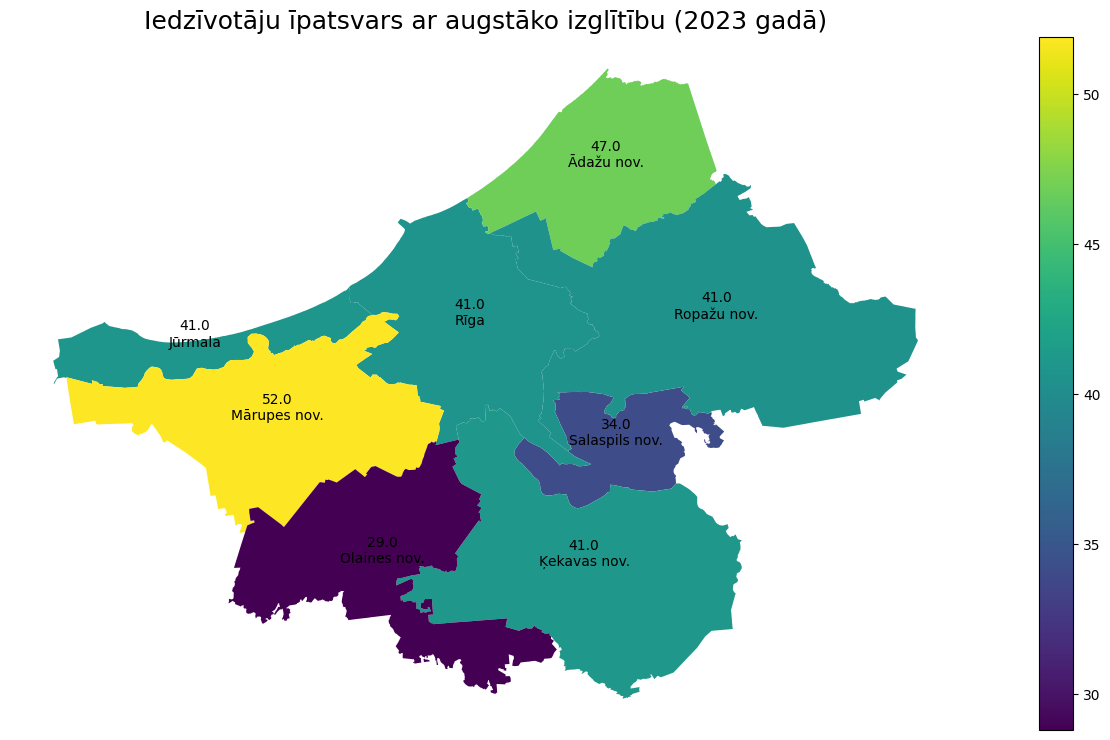

In [47]:
def format_value(value):
    if isinstance(value, str):
        return value
    if value:
        if value < 1:
            return str(round(value, 2))
        else:
            return str(round(value, 0))
    return ""

df = territorial_information_2023.copy()
measure = "Iedzīvotāju īpatsvars ar augstāko izglītību"

df["spatial_lag"] = libpysal.weights.lag_spatial(W, df[measure])
df = df[df["Teritoriālā vienība"].isin(['Ādažu nov.',
 'Mārupes nov.',
 'Ķekavas nov.',
 'Olaines nov.',
 'Salaspils nov.',
 'Jūrmala',
 'Ropažu nov.', 'Rīga'])]

ax = df.plot(
    column=measure, 
    cmap="viridis", 
    legend=True,
    figsize=(20, 9)
)
ax.set_title(f"{measure} ({2023} gadā)", fontsize=18)
df.apply(lambda x: ax.annotate(text=format_value(x[measure])+"\n"+x["Teritoriālā vienība"], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
ax.set_axis_off()

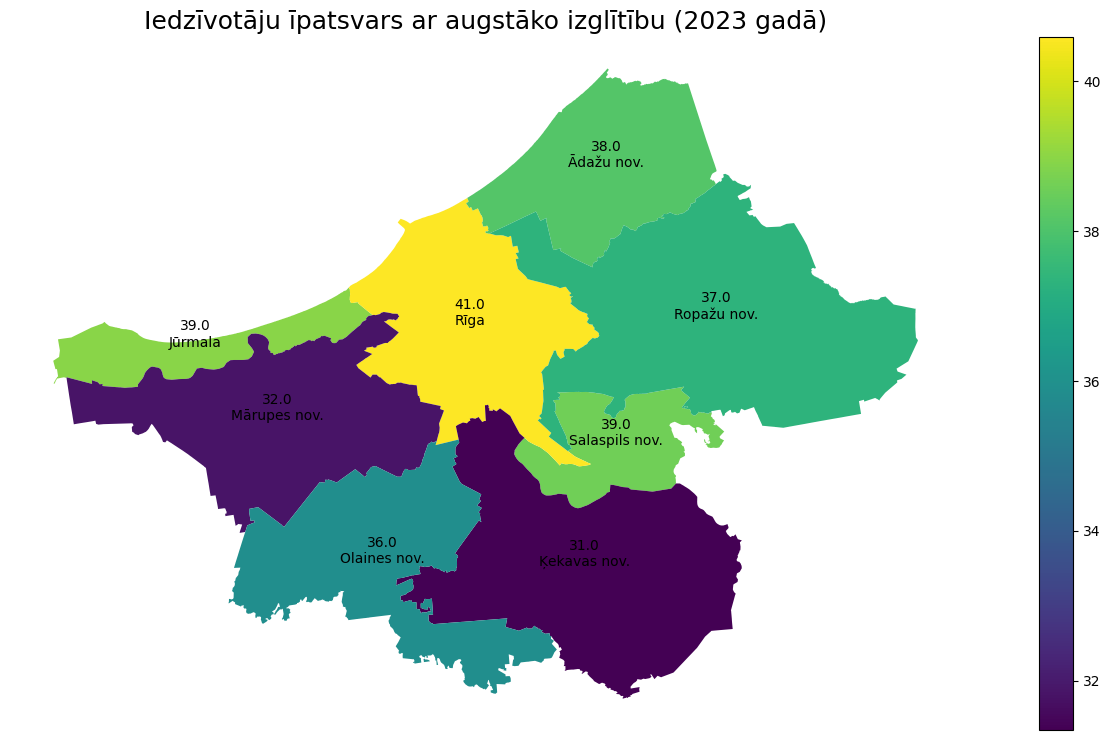

In [44]:
def format_value(value):
    if isinstance(value, str):
        return value
    if value:
        if value < 1:
            return str(round(value, 2))
        else:
            return str(round(value, 0))
    return ""

df = territorial_information_2023.copy()
measure = "Iedzīvotāju īpatsvars ar augstāko izglītību"

df["spatial_lag"] = libpysal.weights.lag_spatial(W, df[measure])
df = df[df["Teritoriālā vienība"].isin(['Ādažu nov.',
 'Mārupes nov.',
 'Ķekavas nov.',
 'Olaines nov.',
 'Salaspils nov.',
 'Jūrmala',
 'Ropažu nov.', 'Rīga'])]

ax = df.plot(
    column="spatial_lag", 
    cmap="viridis", 
    legend=True,
    figsize=(20, 9)
)
ax.set_title(f"{measure} ({2023} gadā)", fontsize=18)
df.apply(lambda x: ax.annotate(text=format_value(x["spatial_lag"])+"\n"+x["Teritoriālā vienība"], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
ax.set_axis_off()

In [26]:
?libpysal.weights.lag_spatial

Signature: libpysal.weights.lag_spatial(w, y)
Docstring:
Spatial lag operator.

If w is row standardized, returns the average of each observation's neighbors;
if not, returns the weighted sum of each observation's neighbors.

Parameters
----------
w                   : W
                      libpysal spatial weightsobject
y                   : array
                      numpy array with dimensionality conforming to w (see examples)

Returns
-------
wy                  : array
                      array of numeric values for the spatial lag

Examples
--------
Setup a 9x9 binary spatial weights matrix and vector of data; compute the
spatial lag of the vector.

>>> import libpysal
>>> import numpy as np
>>> w = libpysal.weights.lat2W(3, 3)
>>> y = np.arange(9)
>>> yl = libpysal.weights.lag_spatial(w, y)
>>> yl
array([ 4.,  6.,  6., 10., 16., 14., 10., 18., 12.])

Row standardize the weights matrix and recompute the spatial lag

>>> w.transform = 'r'
>>> yl = libpysal.weights.lag_spatia

In [38]:
W.neighbors["Rīga"]

['Ādažu nov.',
 'Mārupes nov.',
 'Ķekavas nov.',
 'Olaines nov.',
 'Salaspils nov.',
 'Jūrmala',
 'Ropažu nov.']

In [14]:
dir(W)

['_W__get_id_order',
 '_W__neighbors_0',
 '_W__set_id_order',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_sparse',
 '_cache',
 '_cardinalities',
 '_component_labels',
 '_id2i',
 '_id_order',
 '_id_order_set',
 '_n',
 '_n_components',
 '_reset',
 '_sparse',
 '_transform',
 'asymmetries',
 'asymmetry',
 'cardinalities',
 'component_labels',
 'diagW2',
 'diagWtW',
 'diagWtW_WW',
 'from_WSP',
 'from_adjlist',
 'from_dataframe',
 'from_file',
 'from_iterable',
 'from_networkx',
 'from_shapefile',
 'from_sparse',
 'from_xarray',
 'full',
 'get_transform',
 'histogram',
 'id2i',
 'id_order',
 'id_order_set',
 'islands',
 'max_neighbors